# Output variable -> y 
## y -> Whether the client has subscribed a term deposit or not 
## Binomial ("yes" or "no")

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
da1 = pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
da1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
da1['job']

0           management
1           technician
2         entrepreneur
3          blue-collar
4              unknown
5           management
6           management
7         entrepreneur
8              retired
9           technician
10              admin.
11              admin.
12          technician
13          technician
14            services
15             retired
16              admin.
17         blue-collar
18             retired
19            services
20         blue-collar
21          management
22         blue-collar
23            services
24             retired
25              admin.
26          management
27        entrepreneur
28          management
29          technician
             ...      
45181      blue-collar
45182       technician
45183          retired
45184          retired
45185         services
45186          unknown
45187         services
45188       management
45189         services
45190      blue-collar
45191          retired
45192       management
45193    se

In [5]:
da1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
da1.shape

(45211, 17)

In [7]:
da1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
da1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [14]:
x = da1.iloc[:,0:16]
y = da1.iloc[:,16]

In [15]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [16]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [24]:
x_bank = pd.get_dummies(x)

In [25]:
x_bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [26]:
y_bank = y.eq('yes').mul(1)

In [30]:
y_bank

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
45181    0
45182    1
45183    0
45184    0
45185    1
45186    0
45187    1
45188    1
45189    0
45190    1
45191    1
45192    1
45193    1
45194    0
45195    1
45196    1
45197    1
45198    0
45199    0
45200    1
45201    1
45202    1
45203    1
45204    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_bank,y_bank,test_size=0.3,shuffle=True)

In [33]:
x_train.shape

(31647, 51)

In [34]:
x_test.shape

(13564, 51)

In [35]:
y_train.shape,y_test.shape

((31647,), (13564,))

In [36]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
classifier.intercept_

array([-0.79985351])

In [38]:
classifier.coef_

array([[ 2.48773713e-04,  6.47790331e-06,  1.14874437e-02,
         4.20221248e-03, -1.00329398e-01,  1.34404521e-04,
         7.54718832e-03,  1.16512768e-01, -1.72546809e-01,
        -2.54473623e-01, -2.98295848e-01, -6.85043693e-02,
         3.00190020e-01, -3.02776145e-01, -1.97586138e-01,
         4.98517722e-01, -1.07383545e-01, -1.71220453e-01,
        -1.42287088e-01, -2.22292903e-01, -4.34167267e-01,
        -1.43393337e-01, -3.60982691e-01, -2.05923206e-01,
        -2.57496545e-02, -2.07197956e-01, -4.16530942e-01,
        -3.83322566e-01, -4.28061085e-02, -7.57047399e-01,
        -1.87336820e-01, -6.12516687e-01,  3.47292429e-01,
         1.78751617e-01, -1.32589755e+00, -6.15255243e-02,
        -7.62755151e-01,  4.62323816e-01, -2.44743916e-01,
        -1.30117846e+00, -9.67396418e-01,  4.54756223e-01,
         1.54702731e+00, -4.30782791e-01, -9.46513279e-01,
         7.43402408e-01,  7.07532279e-01, -7.65566353e-01,
        -6.20725294e-01,  1.46546707e+00, -8.79028930e-0

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac

In [41]:
y_train_pred=classifier.predict(x_train)

In [42]:
ac(y_train,y_train_pred)

0.9019180333048946

In [43]:
y_test_pred=classifier.predict(x_test)

In [44]:
ac(y_test,y_test_pred)

0.9009879091713359

In [45]:
confusion_matrix = confusion_matrix(y_test,y_test_pred)
print (confusion_matrix)

[[11677   321]
 [ 1022   544]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95     11998
          1       0.63      0.35      0.45      1566

avg / total       0.89      0.90      0.89     13564



In [50]:
print(classification_report(y_train,y_train_pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     27924
          1       0.66      0.35      0.46      3723

avg / total       0.89      0.90      0.89     31647



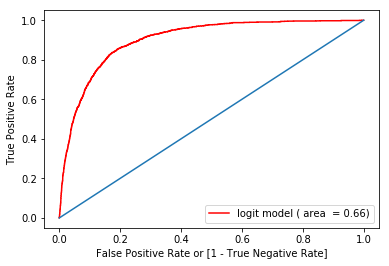

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,y_test_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [51]:
auc

0.6623965723240276

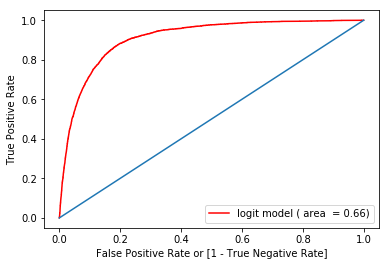

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, classifier.predict_proba (x_train)[:,1])

auc1 = roc_auc_score(y_train,y_train_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [53]:
auc1

0.6623965723240276